## 1. 📈 Line Plot (선 그래프)

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [111]:
df = pd.read_csv('../dataset/air-quality-madrid/madrid_2001.csv')
#df.info()
#df.describe()
#df.isnull().sum()
df.dropna(subset=['date','PM10','station'],inplace=True)
df = df[['date','PM10','station']]
df['year_month'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')
df = df[['year_month','PM10','station']].groupby(by=['station','year_month']).mean('station').reset_index()
df

,station,year_month,PM10
0,28079001,2001-01,40.349433
1,28079001,2001-02,45.124821
2,28079001,2001-03,30.565545
3,28079001,2001-04,30.469222
4,28079001,2001-05,36.468132
...,...,...,...
311,28079099,2001-09,36.872667
312,28079099,2001-10,32.480887
313,28079099,2001-11,35.021111
314,28079099,2001-12,51.666640


In [112]:
station_pm10_means = df.groupby('station').mean('PM10').sort_values('PM10',ascending=False).reset_index()
station_pm10_means

,station,PM10
0,28079017,47.146396
1,28079025,44.737760
2,28079006,43.535255
3,28079001,41.979095
4,28079008,40.770901
5,28079014,39.317101
6,28079003,39.119043
7,28079018,38.598163
8,28079009,38.182959
9,28079007,37.269494


In [114]:
top3_mp10_stations = station_pm10_means['station'].iloc[:3]
top3_mp10_stations

0    28079017
1    28079025
2    28079006
Name: station, dtype: int64

In [126]:
view_datas = [
    {'label':label,'x':df_group.sort_values('year_month').reset_index()['year_month'] ,'y':df_group.sort_values('year_month').reset_index()['PM10']}
    for label,df_group in df.loc[df['station'].isin(top3_mp10_stations)].groupby('station')
]
view_datas

[{'label': 28079006,
  'x': 0     2001-01
  1     2001-02
  2     2001-03
  3     2001-04
  4     2001-05
  5     2001-06
  6     2001-07
  7     2001-08
  8     2001-09
  9     2001-10
  10    2001-11
  11    2001-12
  12    2002-01
  Name: year_month, dtype: object,
  'y': 0     39.165976
  1     51.632891
  2     36.599152
  3     26.301708
  4     37.606869
  5     46.031200
  6     45.556896
  7     47.697571
  8     47.725958
  9     42.264062
  10    46.897458
  11    61.768575
  12    36.709999
  Name: PM10, dtype: float64},
 {'label': 28079017,
  'x': 0    2001-01
  1    2001-02
  2    2001-03
  3    2001-04
  4    2001-10
  5    2001-11
  6    2001-12
  7    2002-01
  Name: year_month, dtype: object,
  'y': 0    40.077921
  1    53.010446
  2    34.721758
  3    24.694732
  4    39.905716
  5    48.651257
  6    69.759339
  7    66.349998
  Name: PM10, dtype: float64},
 {'label': 28079025,
  'x': 0    2001-01
  1    2001-02
  2    2001-03
  3    2001-04
  4    2001-05
  5    

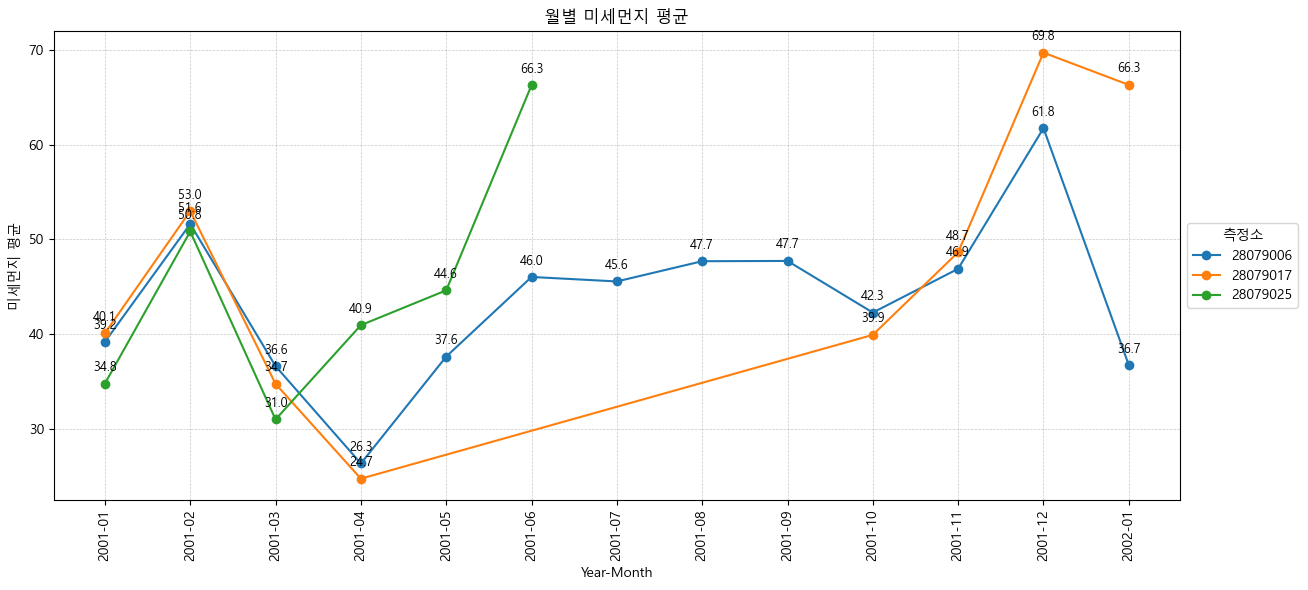

In [132]:
plt.figure(figsize=(12, 6))
for one in view_datas:
    x = one['x']
    y = one['y']
    label = one['label']
    plt.plot(x,y,marker='o',label=label)
    for i in range(len(x)):
        plt.text(x[i], y[i] + 1, f'{y[i]:.1f}', ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=90)
plt.xlabel('Year-Month')
plt.ylabel('미세먼지 평균')
plt.title('월별 미세먼지 평균')
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title='측정소', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()